# wetlabtools
Examples on how to use wetlabtools

In [1]:
import wetlabtools

Loading BokehJS ...

You can access the documentation of every function to view the full list of parameters and a short description of the function (hopefully, if not, I was lazy and you can blame me for that)

In [2]:
wetlabtools.plot.multi_affinity?

Signature:
wetlabtools.plot.multi_affinity(
    data_dir: str = '',
    path_list: list = [],
    normalize: bool = False,
    rel_scale: bool = False,
    fit_sigmoid: bool = True,
    report_kd: bool = True,
    save_fig: bool = False,
    log: bool = True,
    height: int = 4,
    width: int = 6,
    omit_concentrations: list = [],
    omit_samples: list = [],
    **curve_fit_kwargs,
)
Docstring:
data_dir: str, path to the directory containing txt files
path_list: list, list of paths to txt files to plot (instead of data_dir)
normalize: bool, whether to rescale all data from 0 to 100% of respective RU max
rel_scale: bool, whether to scale all plots relative to the max RU (y axis will be 0 - 1)
save_fig: bool, whether to save the figure
fit_sigmoid: bool, whether to fit a sigmoid function
report_kd: bool, whether to print Kd in the legend of the plot
log: bool, whether or not to plot on logarithmic x-axis
heigh: int, height of the plot
wdith: int, width of the plot
omit_concentration

## CD data
Please check the cd examples - the examples here are old! 

Let's plot some CD data. Since the ProData data structure is horrible, we first have to process the data. If you provide a path to a csv file with the buffer baseline, it will return the baseline-corrected CD data. Currently only temperature melts are supported!

/Users/goldbach/git/wetlabtools/wetlabtools/plot/CD.py:297: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


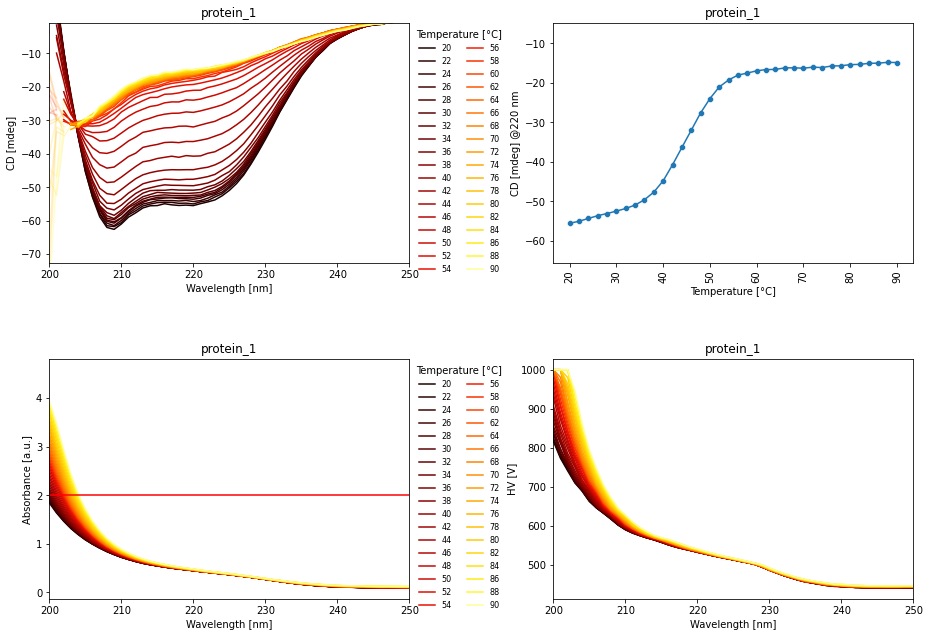

In [3]:
CD_data = 'example_data/cd/sample_1.csv'
buffer = 'example_data/cd/buffer.csv'

# process CD data
data = wetlabtools.plot.load_CD_data(data_csv=CD_data,
                                buffer_csv=buffer)

# now we can plot the data. It will automatically plot all samples
fig = wetlabtools.plot.cd(data=data,
                    zooms=[False],
                    out_path='',
                    cutoff=2.0,
                    mode='fade',
                    min_x=200,
                    max_x=250,
                    save_pdf=False,
                    save_png=False
                   )

## SEC-MALS
You can provide a path to the directory containing all csv files that you want to plot. The function will automatically find all csv files and plot the SEC-MALS data. If you wish to save plots, these will be saved to the same location as the input file.

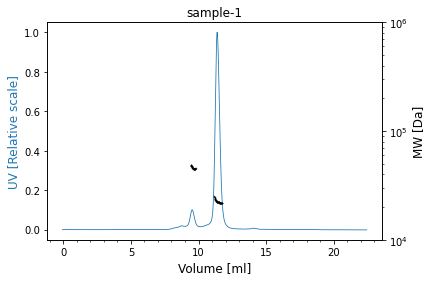

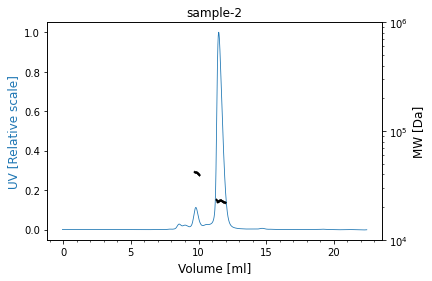

In [4]:
sec_mals = 'example_data/sec_mals'

wetlabtools.plot.secmals(path=sec_mals,
                      flow_rate=0.5,
                      min_x=0,
                      max_x=999,
                      save_pdf=False,
                      save_png=False
                     )

## FPLC data
You have to export your chromatograms from the Äkta Unicorn software. Open the chromatogram in the evaluation software and click "export data" in the top toolbar. This will save the data as a csv file.
### Interactive FPLC plot
You can use the package to create interactive plots of your chromatograms. You can zoom and pan the plot and download the current view as a picture. Click the legend entries if you like to hide data from the plot. You can adjust the plot size using the height and width parameters.

In [ ]:
imac_data = 'example_data/fplc/sample-1_His.csv'

wetlabtools.plot.interactive_fplc(
    csv_path=imac_data,
    height=400,
    width=600
)

### IMAC Plot
This is how you can plot a chromatogram from an IMAC:

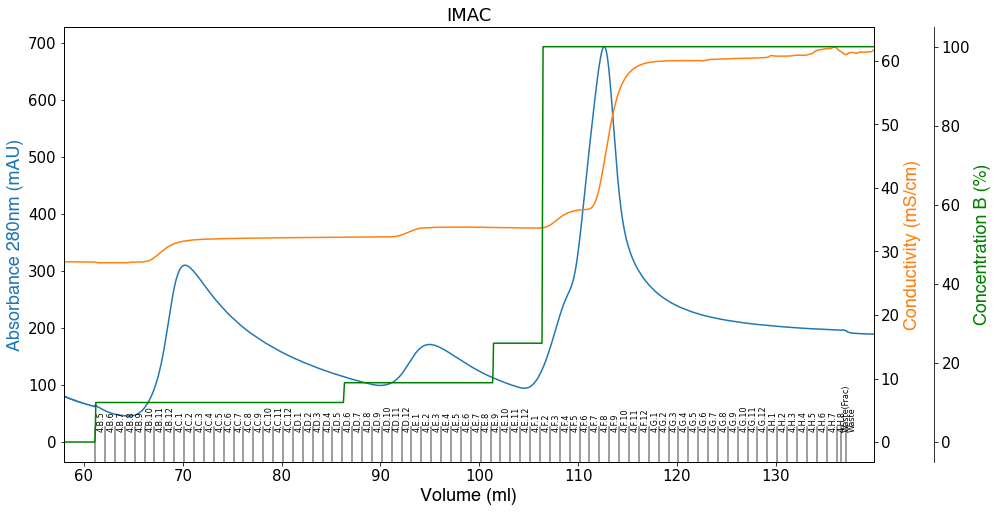

In [ ]:
path = 'example_data/fplc/sample-1_His.csv'
sample = 'IMAC'

# Load data form Unicorn csv file
data = wetlabtools.plot.import_fplc(path)

# plot the imac chromatogram
plot = wetlabtools.plot.fplc(
    data=data,
    fractions=True,
    elution=True,
    concB=True,
    cond=True,
    sample=sample
)

### SEC Plot
This is how you can plot SEC data:

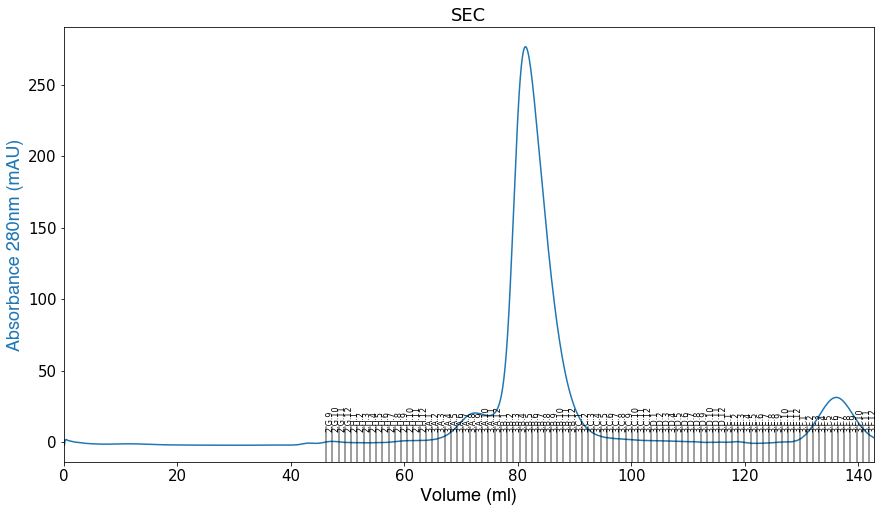

In [ ]:
path = 'example_data/fplc/sample-1_Sec.csv'
sample = 'SEC'

# Load data form Unicorn csv file
data = wetlabtools.plot.import_fplc(path)

# plot the sec chromatogram
plot = wetlabtools.plot.fplc(
    data=data,
    fractions=True,
    sample=sample
)

### FPLC summary
You can plot a summary od all samples in a directory. All FPLC chromatograms need to be saved in csv format in the directory and sample names must be identical. The files need to be named like this: XXX_sample-name_His.csv or XXX_sample-name_SEC.csv. For each sample, the IMAC and SEC chromatogram will be plotted side by side and each sample will be plotted as a new row. If enabled, the plot will be saved in the input directory as 'summary.png'.

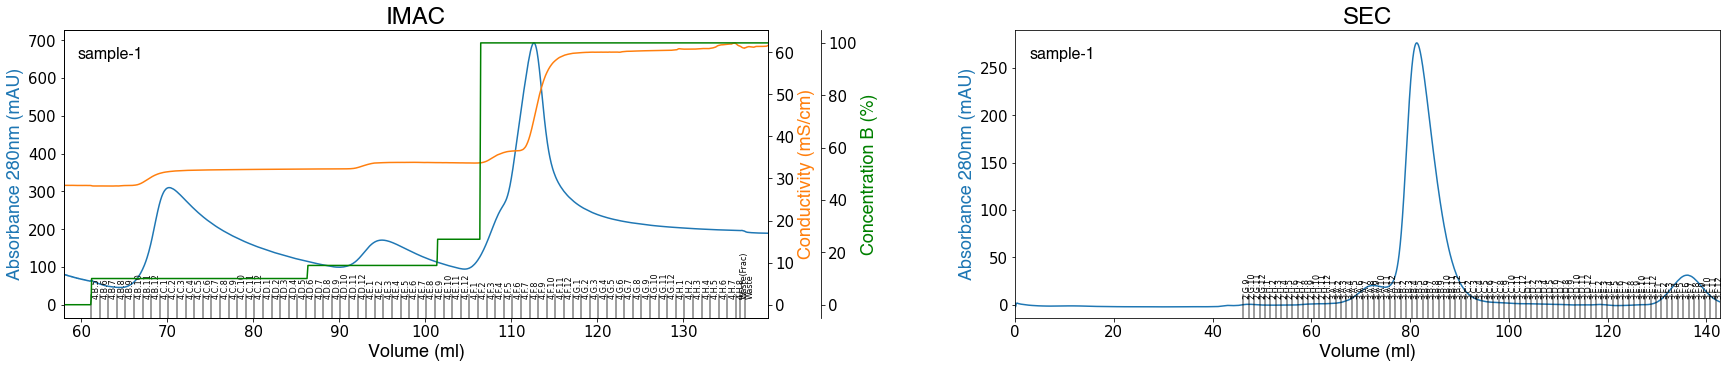

In [8]:
directory = 'example_data/fplc/'

wetlabtools.plot.fplc_summary(directory, save_figure=False)

## SPR data
Data from SPR experiments can easily be plotted after exporting the data to a txt file from the Biacore Insight software. Ligand concentrations are expected to be in µM. You can plot the kinetics (sensorgram) simply by providing the path to the txt file:

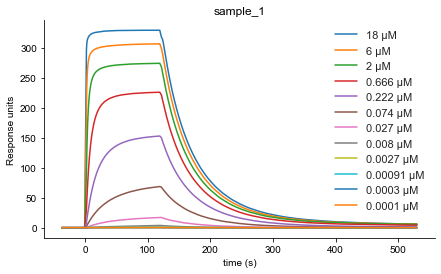

In [ ]:
kinetics = 'example_data/spr/kinetics.txt'
kinetic_plot = wetlabtools.plot.spr_kinetics(
    file=kinetics,
    save_fig=False,
    height=4,
    width=7
)

Steady-state affinity data can be plotted after loading the data. You can also load the fit created in the Biacore Insight software and plot it overlayed to the measured data points.

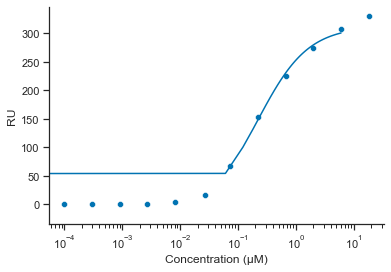

In [ ]:
affinity = 'example_data/spr/sample-1_affinity.txt'

# load the affinity data
affinity_data = wetlabtools.plot.load_affinity_data(affinity)

# load the automatic fit
biacore_fit = wetlabtools.plot.load_affinity_fit(affinity)

# plot the data points and the fit
fig = wetlabtools.plot.spr_affinity(
    measured=affinity_data,
    fitted=biacore_fit,
    log=True,
    save_fig=False,
    height=4,
    width=6
)

Since sometimes the fit from the Biacore software is not nice and also not clear what's actually going on under the hood, some people prefer manually fitting a sigmoid function. Wetlabtools has a function to automatically fit the following [sigmoid function](https://www.graphpad.com/guides/prism/latest/curve-fitting/reg_dr_stim_variable_2.htm) to the experimental data:
$$f(x)=\dfrac{x^{slope}*(max-min)}{x^{slope}+Kd^{slope}}$$

Kd: 284.16 nM


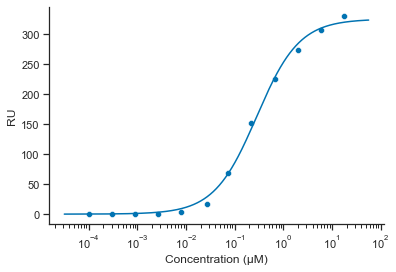

In [ ]:
affinity = 'example_data/spr/sample-1_affinity.txt'

# load the affinity data
affinity_data = wetlabtools.plot.load_affinity_data(affinity)

# load the automatic fit
sig_fit, Kd = wetlabtools.plot.fit_sigmoid_function(
    data=affinity_data,
    mock_scale='log'
)
print(f'Kd: {round(Kd * 1_000, 2)} nM')

# plot the data points and the fit
fig = wetlabtools.plot.spr_affinity(
    measured=affinity_data,
    fitted=sig_fit,
    log=True,
    save_fig=False,
    height=4,
    width=6
)

You can plot multiple curves automatically and plot the data to the same plot. The function assumes the files are named as the following: sample-name_affinity.txt

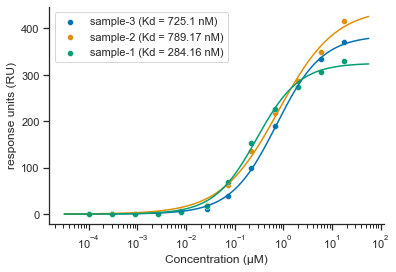

In [12]:
data = 'example_data/spr'
fig = wetlabtools.plot.multi_affinity(data)

## ProtParam
Using wetlabtools, you can calculate the same numbers as with the ExPasy ProtParam tool.

In [13]:
# create a protein from sequence
sequence = 'MSDNDDIEVESDEEQCPRFQSAADKRAHHNALERKRRDHIKDSFHWWTWFYSLRDSVPSLQGEKASR'
protein = wetlabtools.protein.Protein(sequence)

prot_param = protein.print_protparam()



Number of amino acids	67
Molecular Weight (Da)	8046.64
Theoretical pI	5.72
Charge at pH 7.5	-3.68
Molar extinction coefficient (ox) [1/M*cm @ 280nm]	17990
Molar extinction coefficient (red) [1/M*cm @ 280nm]	17990
Absorbance 1% (ox) [A280 @ 10g/l]	22.36
Absorbance 1% (red) [A280 @ 10g/l]	22.36

amino acid frequencies:
A	7.5%
C	1.5%
D	11.9%
E	9.0%
F	4.5%
G	1.5%
H	6.0%
I	3.0%
K	6.0%
L	4.5%
M	1.5%
N	3.0%
P	3.0%
Q	4.5%
R	10.4%
S	11.9%
T	1.5%
V	3.0%
W	4.5%
Y	1.5%

Charge Table:
pH	charge

3.5:	13.15
4.0:	9.88
4.5:	5.89
5.0:	2.77
5.5:	0.75
6.0:	-0.88
6.5:	-2.23
7.0:	-3.14
7.5:	-3.68
8.0:	-4.01
8.5:	-4.35
9.0:	-4.95


There is a function to batch process multiple sequences from a fasta file. This is nice if you ordered many designs and want to calculate the biochemical properties all at once. It can also write the numbers to a csv file.

In [14]:
# processing an entire fasta file at once
fluoresent_proteins = 'example_data/sequences/fluorescent_proteins.fasta'
out_csv = 'example_data/sequences/fp_prot-param.csv'

data = wetlabtools.protein.batch_prot_param(fasta_file=fluoresent_proteins, csv=out_csv)
data

wrote data to example_data/sequences/fp_prot-param.csv


,aa count,MW [Da],pI,Charge (pH 7.5),E280_ox [1/M*cm],E280_red [1/M*cm],A280_ox @ 10g/l,A280_red @ 10g/l
GFP,238,26885.99,5.67,-8.61,22015,21890,8.19,8.14
mCherry,236,26721.88,5.62,-6.67,34380,34380,12.87,12.87
mRFP1,225,25423.41,5.65,-5.69,32890,32890,12.94,12.94
